# **Предобработка данных**

In [1391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1392]:
orders_data = pd.read_csv('train.csv')
orders_data.head()

,Deal_id,Deal_date,First_deal_date,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,First_default_date,Successful_deals_count,Region,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Gender,Default
0,22487461,2015-11-05,2015-08-29,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,8,2.5,-3,5,36.0,Male,0
1,62494261,2016-08-26,2015-12-21,3.5,-2.0,5.0,2016-07-30,2.0,Tavern_district_4,7,2.5,-3,14,3.5,-3,5,29.0,Female,1
2,34822849,2016-02-18,2015-11-11,NaN,NaN,NaN,NaN,0.0,Tavern_district_6,7,2.5,-3,8,2.5,-3,5,56.0,Female,0
3,46893387,2016-04-30,2016-03-22,NaN,NaN,NaN,NaN,0.0,Tavern_district_2,13,2.5,-2,5,2.5,-3,5,27.0,Female,0
4,67128275,2016-09-19,2016-07-21,NaN,NaN,NaN,NaN,0.0,Tavern_district_4,39,2.5,-3,7,2.5,-3,5,37.0,Female,0


In [1393]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Deal_id                 3168 non-null   int64  
 1   Deal_date               3168 non-null   object 
 2   First_deal_date         3168 non-null   object 
 3   Secret_dwarf_info_1     535 non-null    float64
 4   Secret_dwarf_info_2     535 non-null    float64
 5   Secret_dwarf_info_3     535 non-null    float64
 6   First_default_date      535 non-null    object 
 7   Successful_deals_count  3154 non-null   float64
 8   Region                  3161 non-null   object 
 9   Tavern                  3168 non-null   int64  
 10  Hashed_deal_detail_1    3168 non-null   float64
 11  Hashed_deal_detail_2    3168 non-null   int64  
 12  Hashed_deal_detail_3    3168 non-null   int64  
 13  Hashed_deal_detail_4    3168 non-null   float64
 14  Hashed_deal_detail_5    3168 non-null   

В датасете есть категориальные данные, которые нужно преобразовать, а также пропуски, от которых надо избавиться или заполнить.

In [1394]:
orders_data.describe()

,Deal_id,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,Successful_deals_count,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Default
count,3.168000e+03,535.000000,535.000000,535.000000,3154.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.0,3168.000000,3168.000000
mean,4.605727e+07,3.935514,-2.299065,5.267290,1.043754,13.350694,2.518939,-2.404356,8.462437,3.193813,-2.981692,5.0,36.411616,0.110795
std,5.370953e+07,0.888467,0.734579,0.498645,1.649416,8.851891,0.351308,2.474564,3.521127,2.048743,0.245540,0.0,10.821444,0.313928
min,5.856790e+05,2.500000,-3.000000,5.000000,0.000000,2.000000,2.500000,-3.000000,5.000000,2.500000,-3.000000,5.0,20.000000,0.000000
25%,2.761608e+07,3.500000,-3.000000,5.000000,0.000000,7.000000,2.500000,-3.000000,6.000000,2.500000,-3.000000,5.0,28.000000,0.000000
50%,4.349426e+07,3.500000,-2.000000,5.000000,0.000000,8.000000,2.500000,-3.000000,8.000000,2.500000,-3.000000,5.0,34.000000,0.000000
75%,5.778544e+07,4.500000,-2.000000,5.000000,2.000000,15.000000,2.500000,-3.000000,10.000000,2.500000,-3.000000,5.0,43.000000,0.000000
max,6.927701e+08,9.500000,2.000000,8.000000,17.000000,58.000000,17.500000,78.000000,29.000000,37.500000,4.000000,5.0,72.000000,1.000000


Столбец "Hashed_deal_detail_6" содержит только значения 5, значит им можно пренебречь.

In [1395]:
print(orders_data.shape)
orders_data.drop(['Hashed_deal_detail_6'], axis = 1, inplace = True)
orders_data.shape

(3168, 19)


(3168, 18)

Заменим значения "Male" и "Female" в столбце "Gender" на 0 т 1 соответственно.

In [1396]:
orders_data['Gender'].replace('Male', 0, inplace = True)
orders_data['Gender'].replace('Female', 1, inplace = True)

In [1397]:
orders_data.isna().sum()

Deal_id                      0
Deal_date                    0
First_deal_date              0
Secret_dwarf_info_1       2633
Secret_dwarf_info_2       2633
Secret_dwarf_info_3       2633
First_default_date        2633
Successful_deals_count      14
Region                       7
Tavern                       0
Hashed_deal_detail_1         0
Hashed_deal_detail_2         0
Hashed_deal_detail_3         0
Hashed_deal_detail_4         0
Hashed_deal_detail_5         0
Age                          0
Gender                       0
Default                      0
dtype: int64

Построим тепловую карту для пропусков данных.

<Axes: >

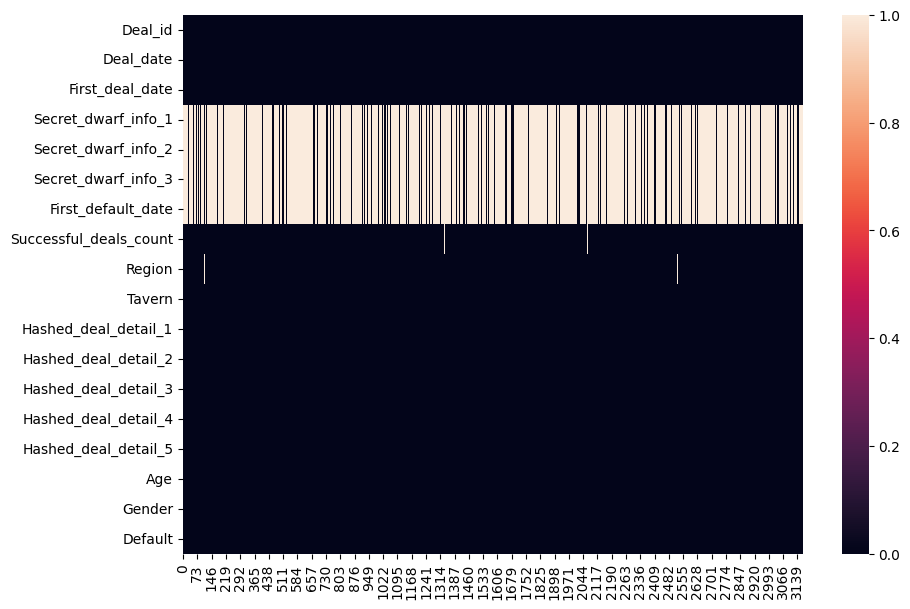

In [1398]:
plt.figure(figsize = (10,7))
sns.heatmap(orders_data.isna().transpose())

Видно что 3 столбца с засекреченными признакми и столбец даты первого дефолта по гному имеют большое количество пропусков, а имено 83%, так что имеет смысл их вовсе исключить из датасета.

In [1399]:
orders_data.drop(['Secret_dwarf_info_1', 'Secret_dwarf_info_2', 'Secret_dwarf_info_3', 'First_default_date'], axis = 1, inplace = True)
orders_data.shape

(3168, 14)

Заменим пропуски свойства "Region" на моду.

In [1400]:
orders_data['Region'].value_counts()

Region
Tavern_district_3    1204
Tavern_district_6     478
Tavern_district_2     448
Tavern_district_4     364
Tavern_district_1     240
Tavern_district_0     213
Tavern_district_5     160
Tavern_district_7      54
Name: count, dtype: int64

In [1401]:
orders_data['Region'].mode()[0]

'Tavern_district_3'

In [1402]:
orders_data['Region'] = orders_data['Region'].fillna(orders_data['Region'].mode()[0])

Проверим, что не осталось пропусков.

In [1403]:
orders_data['Region'].isna().sum()

0

Проверим, что пропуски заменились на моду.

In [1404]:
orders_data['Region'].value_counts()

Region
Tavern_district_3    1211
Tavern_district_6     478
Tavern_district_2     448
Tavern_district_4     364
Tavern_district_1     240
Tavern_district_0     213
Tavern_district_5     160
Tavern_district_7      54
Name: count, dtype: int64

Так как пропуски из фичи "Region" были заменены, то создадим бинарные колонки для регионов дистриктов вместо категориального признака "Region". Если клиент, сделавший этот заказ, сделал его в таверне дистректа 3, то в значении для дистректа 3 будет стоять единица, а для остальных дистректов 0.

In [1405]:
region_cols = pd.get_dummies(orders_data['Region'], dtype = 'int')
region_cols.head()

,Tavern_district_0,Tavern_district_1,Tavern_district_2,Tavern_district_3,Tavern_district_4,Tavern_district_5,Tavern_district_6,Tavern_district_7
0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0


Проверим, что значений действительно 3168.

In [1406]:
region_cols.value_counts().sum()

3168

In [1407]:
tavern_cols = pd.get_dummies(orders_data['Tavern'], dtype = 'int64')
tavern_cols.columns = tavern_cols.columns.astype(str)
tavern_cols

,2,7,8,10,13,15,17,18,22,23,26,27,39,43,44,45,47,49,58
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3164,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3165,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3166,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Заменим пропуски свойства "Successful_deals_count" на среднее значение.

In [1408]:
orders_data['Successful_deals_count'].mean()

1.0437539632213062

Так как не бывает нецелого количества заказов, то округлим число и заменим им пропуски

In [1409]:
orders_data['Successful_deals_count'].fillna(int(orders_data['Successful_deals_count'].mean()), inplace = True)

In [1410]:
orders_data['Successful_deals_count'] = orders_data['Successful_deals_count'].astype('int64')

In [1411]:
orders_data['Successful_deals_count'].value_counts()

Successful_deals_count
0     1903
2      592
3      244
1      208
4      105
5       52
6       23
7       13
8        9
9        8
10       6
17       2
12       2
11       1
Name: count, dtype: int64

Построим тепловую карту ещё раз, как видно, пропусков больше нет. Осталось преобразовать даты в тип данных даты и можно делать модельку.

<Axes: >

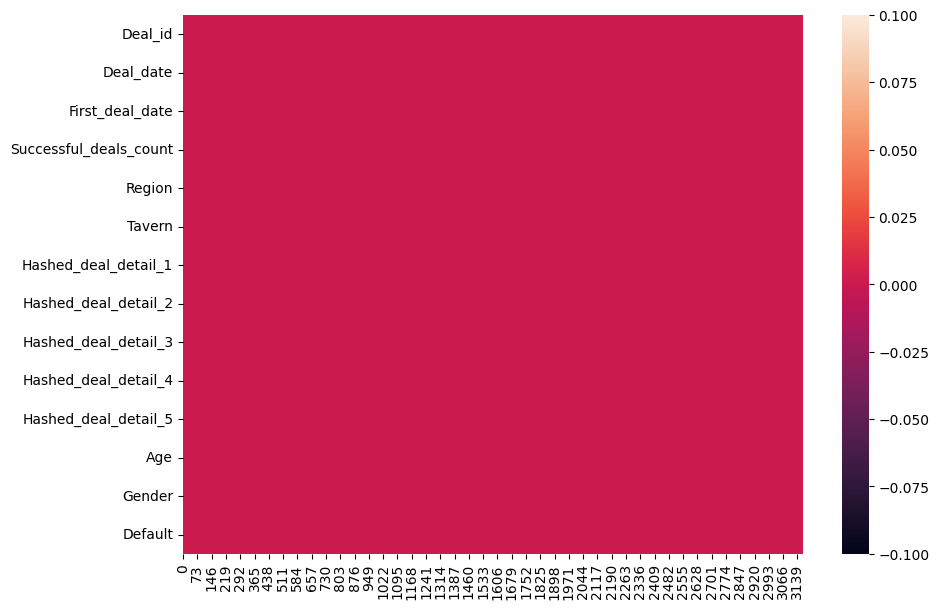

In [1412]:
plt.figure(figsize = (10,7))
sns.heatmap(orders_data.isna().transpose())

убедимся, что пропусков действительно нет.

In [1413]:
orders_data.isna().sum()

Deal_id                   0
Deal_date                 0
First_deal_date           0
Successful_deals_count    0
Region                    0
Tavern                    0
Hashed_deal_detail_1      0
Hashed_deal_detail_2      0
Hashed_deal_detail_3      0
Hashed_deal_detail_4      0
Hashed_deal_detail_5      0
Age                       0
Gender                    0
Default                   0
dtype: int64

Сделаем даты типом данных date.

In [1414]:
date_columns = ['Deal_date', 'First_deal_date']

for col in date_columns:
  orders_data[col] = pd.to_datetime(orders_data[col], format='%Y-%m-%d') #'%Y-%m-%d'

for col in date_columns:
  orders_data[col] = orders_data[col].astype(np.int64) // (10**9*3600*24*30)

orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Deal_id                 3168 non-null   int64  
 1   Deal_date               3168 non-null   int64  
 2   First_deal_date         3168 non-null   int64  
 3   Successful_deals_count  3168 non-null   int64  
 4   Region                  3168 non-null   object 
 5   Tavern                  3168 non-null   int64  
 6   Hashed_deal_detail_1    3168 non-null   float64
 7   Hashed_deal_detail_2    3168 non-null   int64  
 8   Hashed_deal_detail_3    3168 non-null   int64  
 9   Hashed_deal_detail_4    3168 non-null   float64
 10  Hashed_deal_detail_5    3168 non-null   int64  
 11  Age                     3168 non-null   float64
 12  Gender                  3168 non-null   int64  
 13  Default                 3168 non-null   int64  
dtypes: float64(3), int64(10), object(1)
memo

In [1415]:
datafr = pd.read_csv('train.csv')
has4 = (datafr['Hashed_deal_detail_4'] == 2.5).astype(int)
secret_info_3 = datafr['Secret_dwarf_info_3'].notna().astype(int)
has4

0       1
1       0
2       1
3       1
4       1
       ..
3163    1
3164    1
3165    0
3166    1
3167    1
Name: Hashed_deal_detail_4, Length: 3168, dtype: int64

# **Обучени модели и проверка качества.**

Исключим из финального датасета номер заказа, регион таверны, а таргетную переменную запишем как y.

In [1587]:
df = orders_data.drop(['Deal_id', 'Default', 'Region', 'Tavern', 'Hashed_deal_detail_1', 'Hashed_deal_detail_5', 'Hashed_deal_detail_4'], axis = 1)

X = pd.concat([df, region_cols, secret_info_3, tavern_cols, has4], axis = 1)

y = orders_data['Default']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Deal_date               3168 non-null   int64  
 1   First_deal_date         3168 non-null   int64  
 2   Successful_deals_count  3168 non-null   int64  
 3   Hashed_deal_detail_2    3168 non-null   int64  
 4   Hashed_deal_detail_3    3168 non-null   int64  
 5   Age                     3168 non-null   float64
 6   Gender                  3168 non-null   int64  
 7   Tavern_district_0       3168 non-null   int64  
 8   Tavern_district_1       3168 non-null   int64  
 9   Tavern_district_2       3168 non-null   int64  
 10  Tavern_district_3       3168 non-null   int64  
 11  Tavern_district_4       3168 non-null   int64  
 12  Tavern_district_5       3168 non-null   int64  
 13  Tavern_district_6       3168 non-null   int64  
 14  Tavern_district_7       3168 non-null   

In [1588]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

,Deal_date,First_deal_date,Successful_deals_count,Hashed_deal_detail_2,Hashed_deal_detail_3,Age,Gender,Tavern_district_0,Tavern_district_1,Tavern_district_2,...,26,27,39,43,44,45,47,49,58,Hashed_deal_detail_4
807,564,558,0,-3,11,53.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2495,558,556,0,-3,6,23.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2529,566,562,0,-3,8,31.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2241,562,558,0,-3,9,30.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2981,562,556,2,-3,11,34.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [1589]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=53, weights = 'uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=53)

In [1590]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score

print('train_accuracy', accuracy_score(y_train, y_train_pred, normalize=True))
print('train_accuracy', accuracy_score(y_test, y_test_pred, normalize=True))

pred_proba_knn = knn.predict_proba(X_test)

train_accuracy 0.8902920284135754
train_accuracy 0.8848580441640379


0.6811222621053402


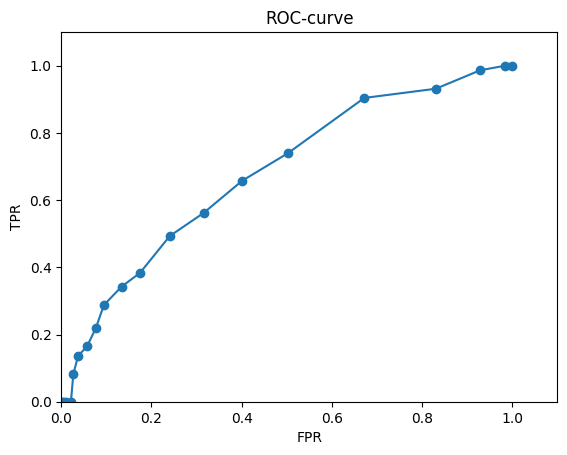

In [1591]:
from sklearn.metrics import auc, roc_curve

fprs, tprs, thr = roc_curve(y_test, pred_proba_knn[:,1])

plt.plot(fprs, tprs, marker = 'o')
plt.ylim([0,1.1])
plt.xlim([0,1.1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')

print(auc(fprs, tprs))

In [1592]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=9, min_samples_split = 9, max_leaf_nodes=77, random_state = 42)
tree.fit(X_train, y_train)

y2_pred_train = tree.predict(X_train)
y2_pred_test = tree.predict(X_test)

pred_proba_tree = tree.predict_proba(X_test)
pred_proba_tree

array([[0.5       , 0.5       ],
       [0.9       , 0.1       ],
       [0.96898263, 0.03101737],
       ...,
       [0.96898263, 0.03101737],
       [0.9       , 0.1       ],
       [1.        , 0.        ]])

0.6933802163455668


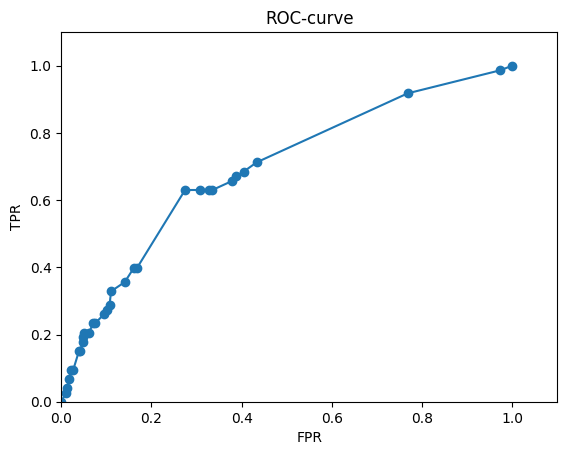

In [1593]:
fprs2, tprs2, thr2 = roc_curve(y_test, pred_proba_tree[:,1])

plt.plot(fprs2, tprs2, marker = 'o')
plt.ylim([0,1.1])
plt.xlim([0,1.1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')

print(auc(fprs2, tprs2))

In [1594]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)

y3_pred_train = log.predict(X_train)
y3_pred_test = log.predict(X_test)

pred_proba_log = log.predict_proba(X_test)
pred_proba_log

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[0.95126653, 0.04873347],
       [0.88761965, 0.11238035],
       [0.97579851, 0.02420149],
       ...,
       [0.98140248, 0.01859752],
       [0.59617056, 0.40382944],
       [0.73323932, 0.26676068]])

0.7038800576270359


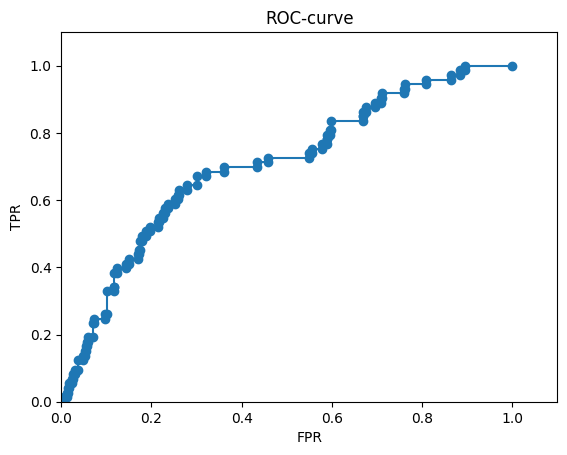

In [1595]:
fprs3, tprs3, thr3 = roc_curve(y_test, pred_proba_log[:,1])

plt.plot(fprs3, tprs3, marker = 'o')
plt.ylim([0,1.1])
plt.xlim([0,1.1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')

print(auc(fprs3, tprs3))

In [1596]:
from sklearn.tree import ExtraTreeClassifier

ex_tree = ExtraTreeClassifier(max_depth=9, min_samples_split = 9, max_leaf_nodes=77, random_state = 42)
ex_tree.fit(X_train, y_train)

y4_pred_train = ex_tree.predict(X_train)
y4_pred_test = ex_tree.predict(X_test)

pred_proba_ex_tree = ex_tree.predict_proba(X_test)
pred_proba_ex_tree

array([[0.95      , 0.05      ],
       [0.68627451, 0.31372549],
       [0.95      , 0.05      ],
       ...,
       [0.93886463, 0.06113537],
       [0.44      , 0.56      ],
       [0.66666667, 0.33333333]])

0.6699997558176446


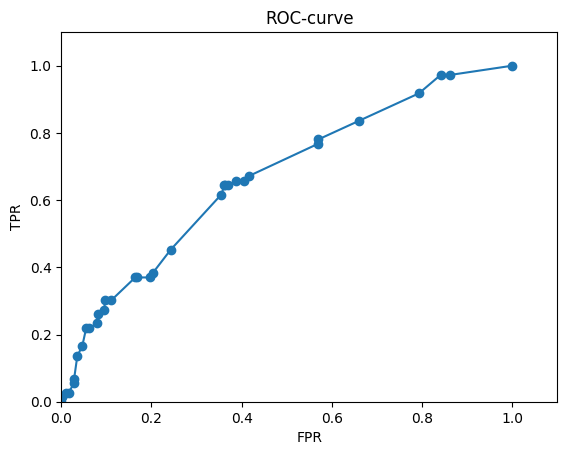

In [1597]:
fprs4, tprs4, thr4 = roc_curve(y_test, pred_proba_ex_tree[:,1])

plt.plot(fprs4, tprs4, marker = 'o')
plt.ylim([0,1.1])
plt.xlim([0,1.1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')

print(auc(fprs4, tprs4))

In [1598]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier(n_estimators = 50, min_samples_leaf = 9, random_state = 42)
grad_boost.fit(X_train, y_train)

y5_pred_train = grad_boost.predict(X_train)
y5_pred_test = grad_boost.predict(X_test)

pred_proba_grad_boost = grad_boost.predict_proba(X_test)
pred_proba_grad_boost

array([[0.90589007, 0.09410993],
       [0.85275632, 0.14724368],
       [0.96979506, 0.03020494],
       ...,
       [0.94664286, 0.05335714],
       [0.79705937, 0.20294063],
       [0.53266156, 0.46733844]])

0.7240495201816716


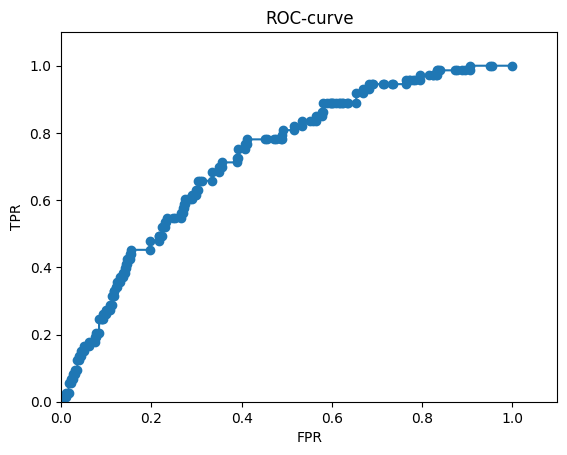

In [1599]:
fprs5, tprs5, thr5 = roc_curve(y_test, pred_proba_grad_boost[:,1])

plt.plot(fprs5, tprs5, marker = 'o')
plt.ylim([0,1.1])
plt.xlim([0,1.1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')

print(auc(fprs5, tprs5))